In [1]:
import pandas as pd
import datetime as dt
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")


from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing
import statsmodels.api as sm 

# Import the data

In [12]:
### Import the data

data = pd.read_csv('data/01_datawrangling_bytract_out.csv', index_col=0)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
med_houseinc_12mon,83571.0,-1.159958e+07,8.747196e+07,-666666666.0,52615.0000,71092.0000,97500.000000,250001.000000
household_public_assistance1,83571.0,1.491813e+03,6.459862e+02,0.0,1046.0000,1434.0000,1878.000000,8988.000000
gini,83571.0,-8.679246e+06,7.557052e+07,-666666666.0,0.3738,0.4143,0.460500,0.877600
total_population,77544.0,-8.747994e+06,7.595848e+07,-666666666.0,12376.0000,18656.5000,27129.250000,135507.000000
total_male,83571.0,1.947575e+03,8.891830e+02,0.0,1330.0000,1853.0000,2456.000000,27065.000000
total_female,83571.0,1.980122e+03,8.980243e+02,0.0,1352.0000,1890.0000,2506.000000,15184.000000
total_travel_time_to_work,83571.0,1.641011e+03,8.043443e+02,0.0,1077.0000,1557.0000,2111.000000,24591.000000
median_monthly_housing_costs,83571.0,-1.006593e+07,8.130364e+07,-666666666.0,882.0000,1220.0000,1700.000000,4001.000000
total_monthlyHousingCosts,83571.0,1.491813e+03,6.459862e+02,0.0,1046.0000,1434.0000,1878.000000,8988.000000
total_HousingCosts_lessThan100,83571.0,4.300547e+00,1.598855e+01,0.0,0.0000,0.0000,0.000000,637.000000


In [13]:
print(data.shape)
data.dtypes

(83571, 56)


med_houseinc_12mon                                   float64
household_public_assistance1                         float64
gini                                                 float64
total_population                                     float64
total_male                                           float64
total_female                                         float64
total_travel_time_to_work                            float64
median_monthly_housing_costs                         float64
total_monthlyHousingCosts                            float64
total_HousingCosts_lessThan100                       float64
total_HousingCosts_500To599                          float64
total_HousingCosts_1000To1499                        float64
total_HousingCosts_1500To1999                        float64
total_HousingCosts_2000To2499                        float64
total_HousingCosts_2500To2999                        float64
total_HousingCosts_3000OrMore                        float64
median_age_male         

## Remove Missing data
-666666666.0 is missing

In [24]:
data = data.replace(-666666666.0, np.nan)
print(data.shape)
data.isna().sum()

(83571, 57)


med_houseinc_12mon                                   1464
household_public_assistance1                            0
gini                                                 1088
total_population                                     7047
total_male                                              0
total_female                                            0
total_travel_time_to_work                               0
median_monthly_housing_costs                         1262
total_monthlyHousingCosts                               0
total_HousingCosts_lessThan100                          0
total_HousingCosts_500To599                             0
total_HousingCosts_1000To1499                           0
total_HousingCosts_1500To1999                           0
total_HousingCosts_2000To2499                           0
total_HousingCosts_2500To2999                           0
total_HousingCosts_3000OrMore                           0
median_age_male                                       843
median_age_fem

#### drop missing - only about 1-2 % of census data missing


In [25]:
data = data.dropna()
print(data.shape)
data.isna().sum()

(76372, 57)


med_houseinc_12mon                                   0
household_public_assistance1                         0
gini                                                 0
total_population                                     0
total_male                                           0
total_female                                         0
total_travel_time_to_work                            0
median_monthly_housing_costs                         0
total_monthlyHousingCosts                            0
total_HousingCosts_lessThan100                       0
total_HousingCosts_500To599                          0
total_HousingCosts_1000To1499                        0
total_HousingCosts_1500To1999                        0
total_HousingCosts_2000To2499                        0
total_HousingCosts_2500To2999                        0
total_HousingCosts_3000OrMore                        0
median_age_male                                      0
median_age_female                                    0
education_

# Calculate metrics to try
 1. calculate a change in flood occurence


In [14]:
# calculate change in floods as ratio
data['delta_floods'] = (data['nflood_2010s'] - data['nflood_2000s']) / (data['nflood_2010s'] + data['nflood_2000s'])
data.loc[data['nflood_2010s'] + data['nflood_2000s'] == 0, 'delta_floods'] = 0 # fill in zero if no floods (denom would be zero)


# Check correlations of new variance metrics

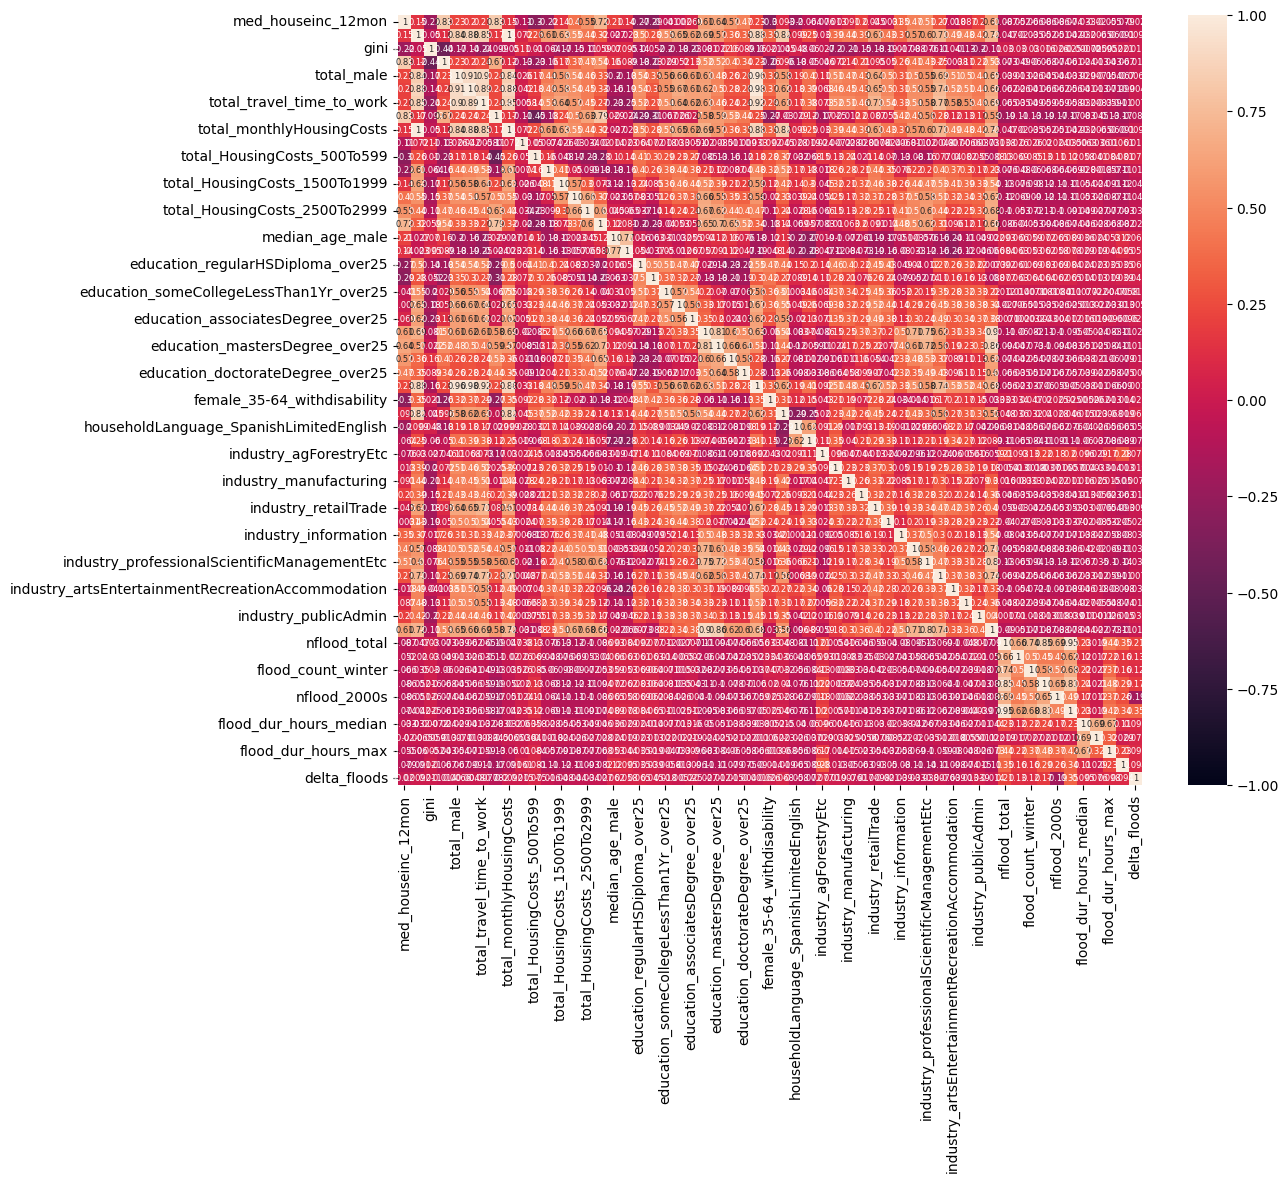

In [26]:
### show heatmap
f, ax = plt.subplots(1, 1, figsize=(12, 10))
sns.heatmap(data.corr(), vmin=-1, vmax=1, ax=ax, annot=True, annot_kws={"fontsize":6})
plt.show()


In [29]:
data.corr()[['nflood_total', 'flood_count_winter', 'flood_count_spring']].sort_values('nflood_total')

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


,nflood_total,flood_count_winter,flood_count_spring
median_monthly_housing_costs,-0.189848,-0.126888,-0.189173
industry_professionalScientificManagementEtc,-0.130010,-0.093879,-0.131961
total_HousingCosts_1500To1999,-0.127879,-0.098404,-0.122413
total_HousingCosts_2000To2499,-0.122752,-0.090461,-0.121150
householdLanguage_SpanishNotLimitedEnglish,-0.114654,-0.083535,-0.110031
education_BachelorsDegree_over25,-0.107664,-0.082392,-0.105534
total_HousingCosts_2500To2999,-0.103352,-0.072221,-0.107060
industry_artsEntertainmentRecreationAccommodation,-0.099576,-0.072460,-0.101842
industry_financeInsuranceRealEstate,-0.094933,-0.074460,-0.087705
education_mastersDegree_over25,-0.093696,-0.073403,-0.100760


Pretty weak correlations... not sure if this will yield good results. 


# Plot all the data
check for outliers

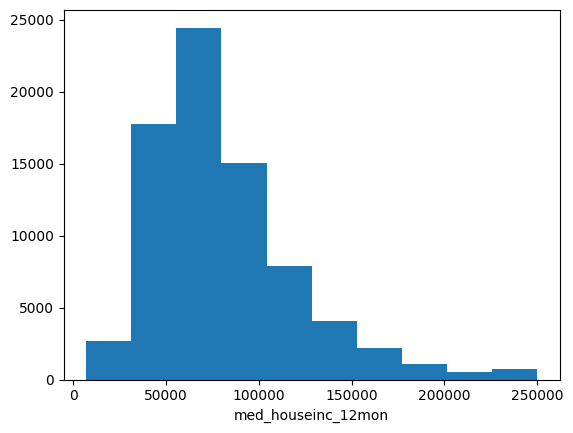

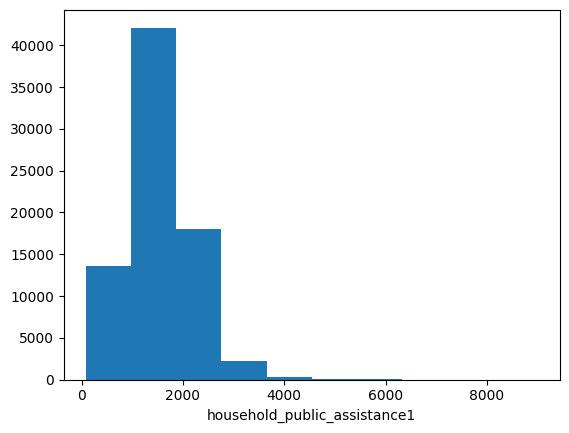

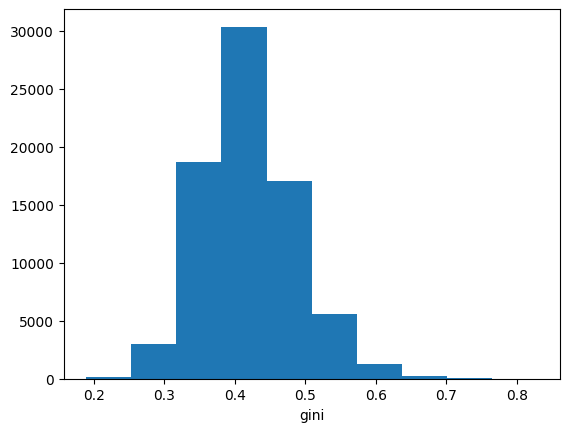

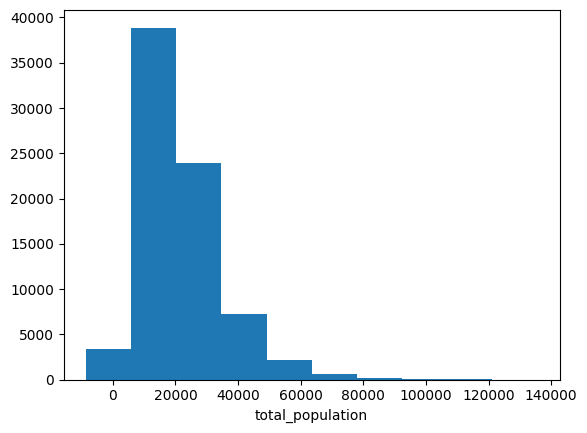

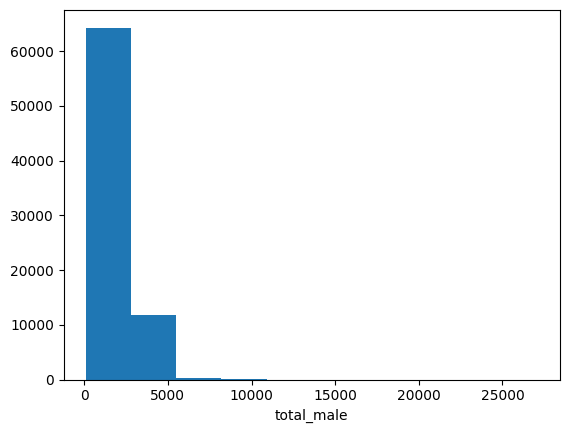

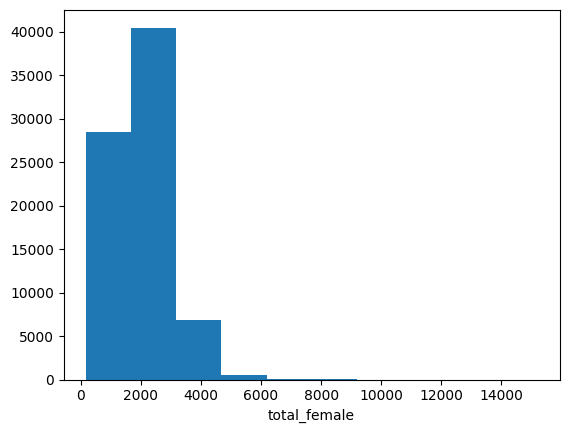

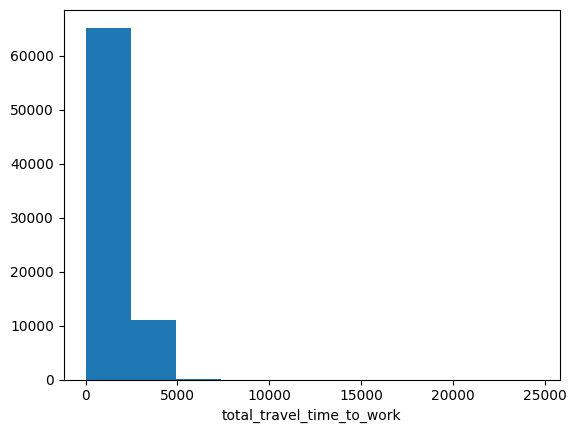

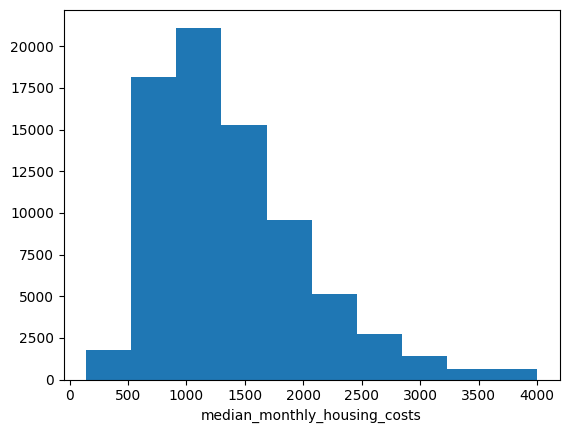

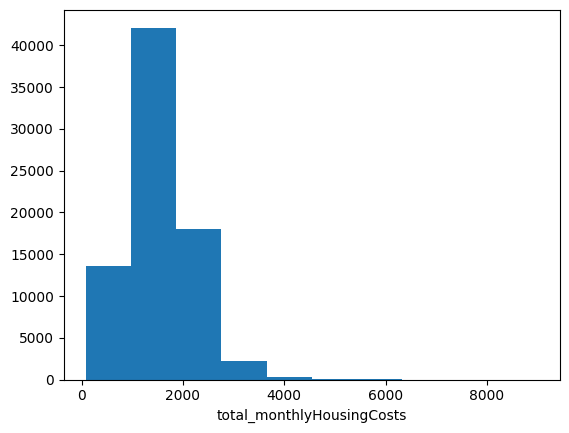

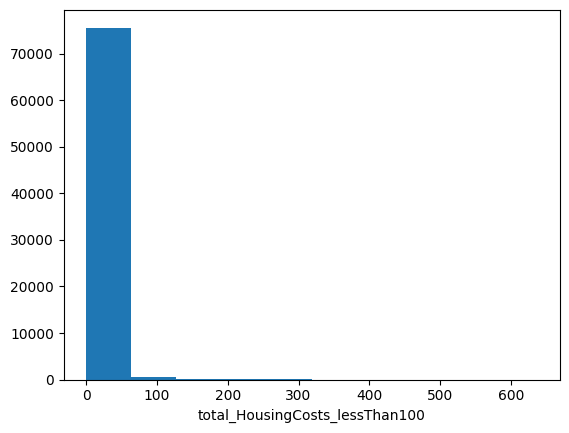

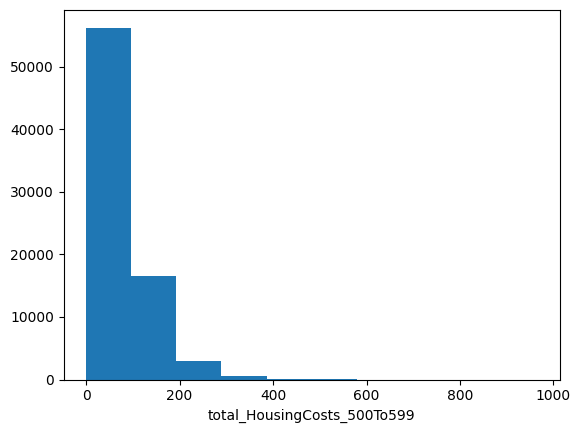

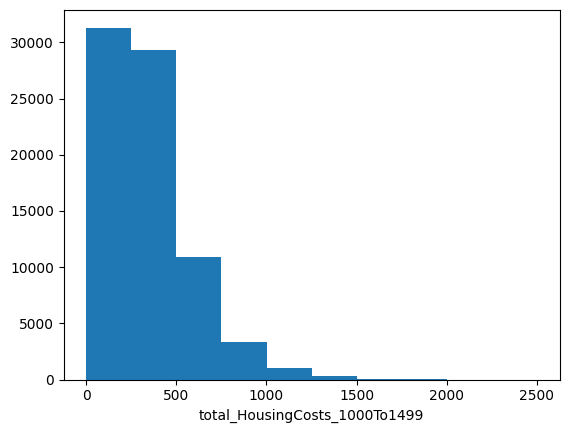

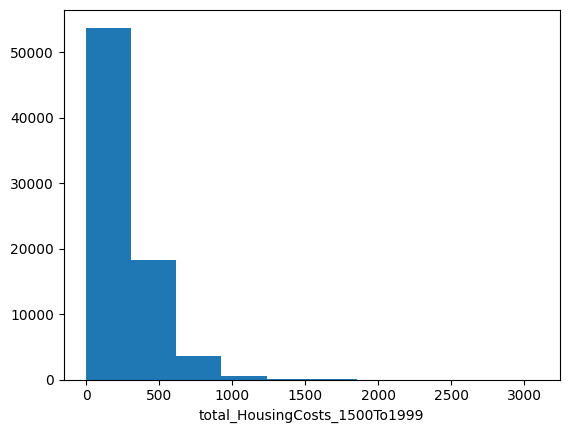

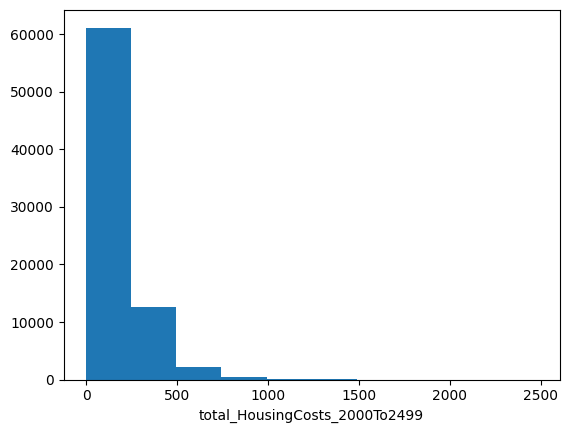

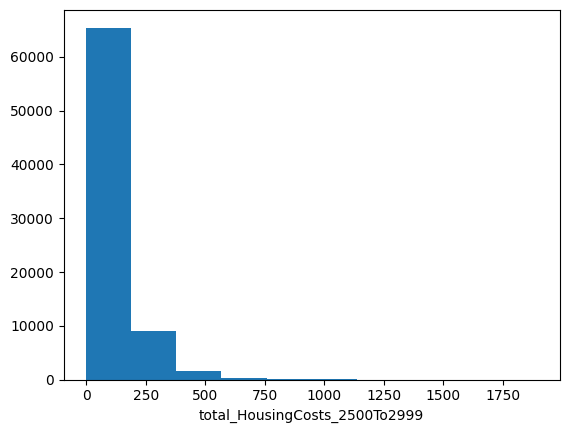

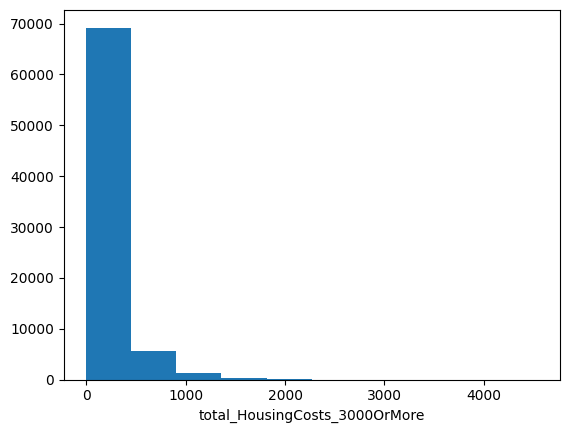

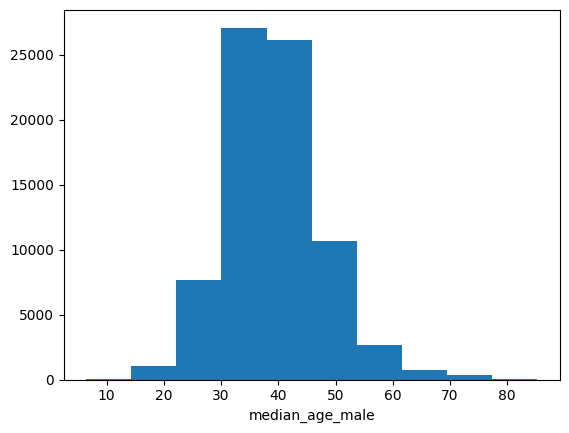

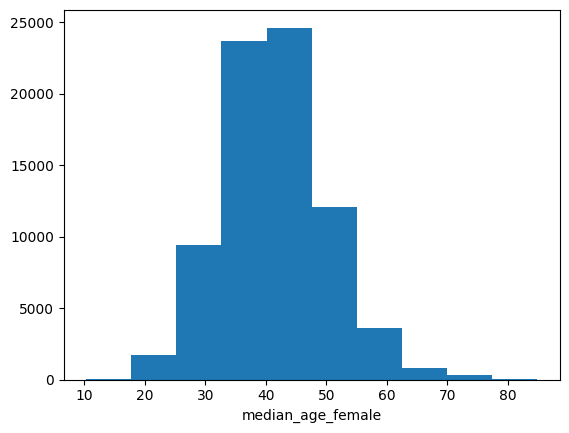

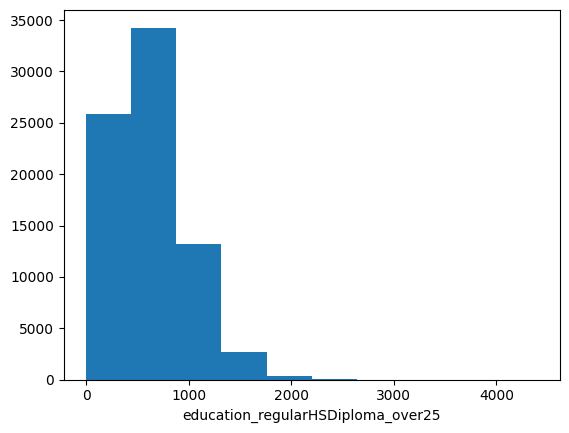

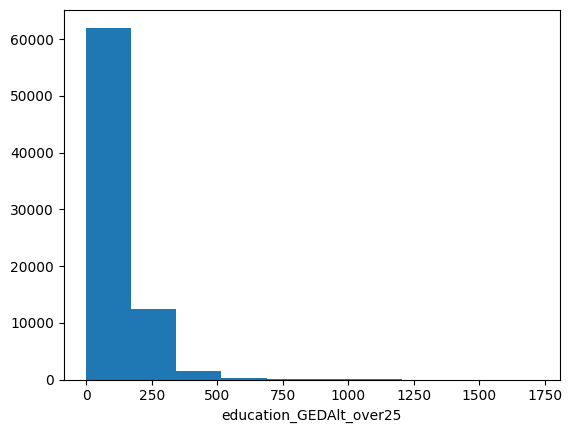

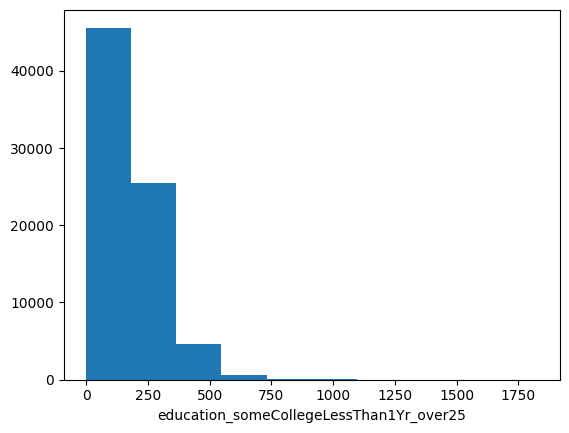

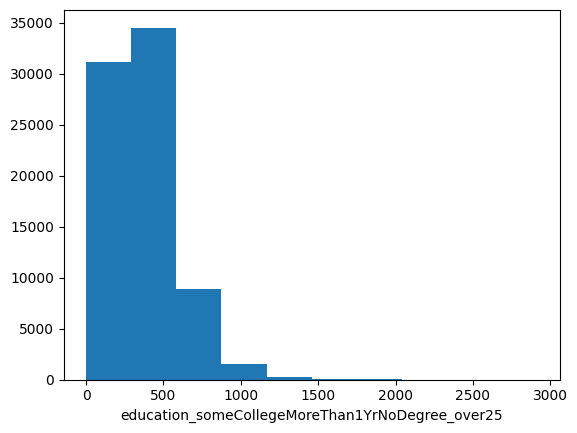

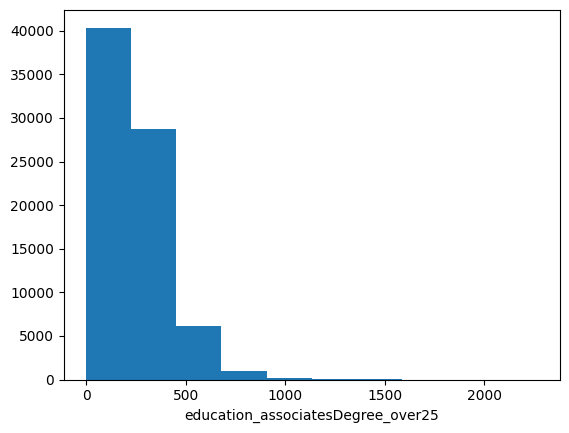

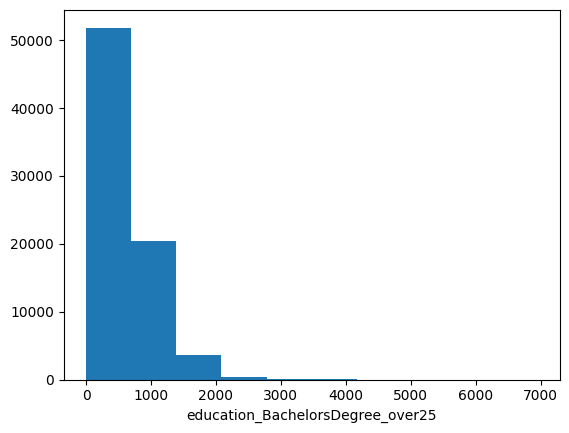

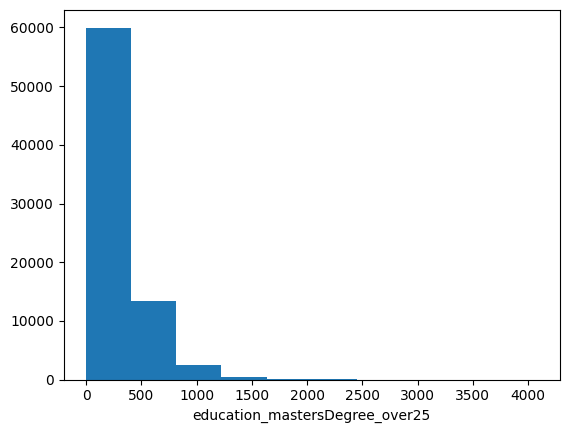

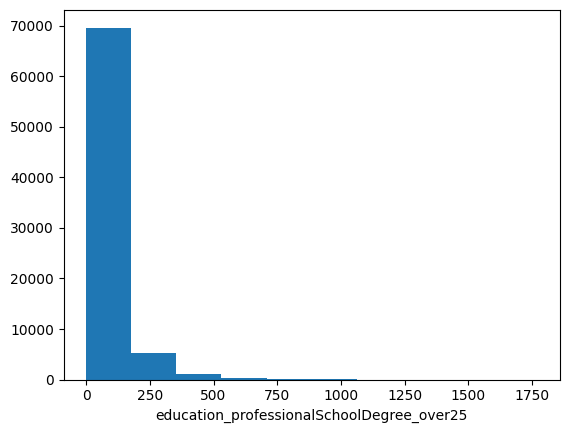

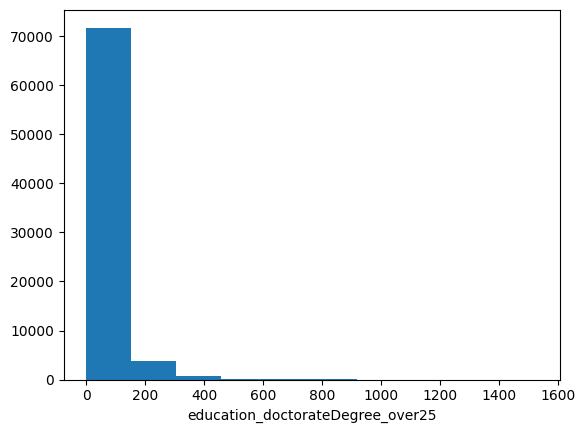

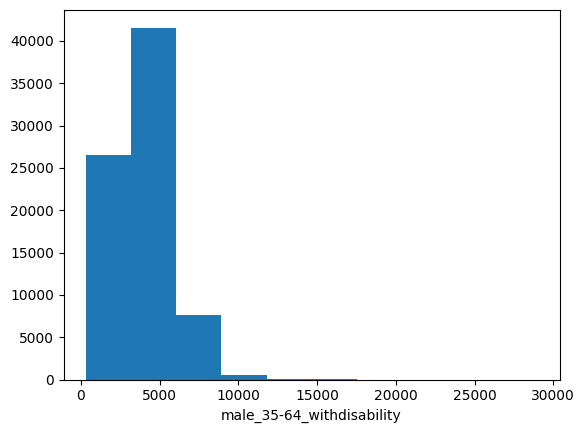

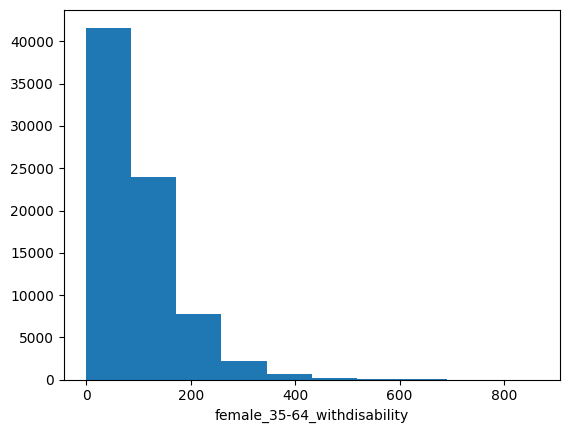

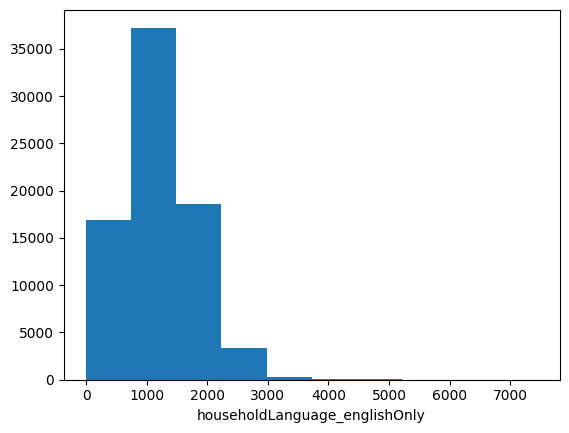

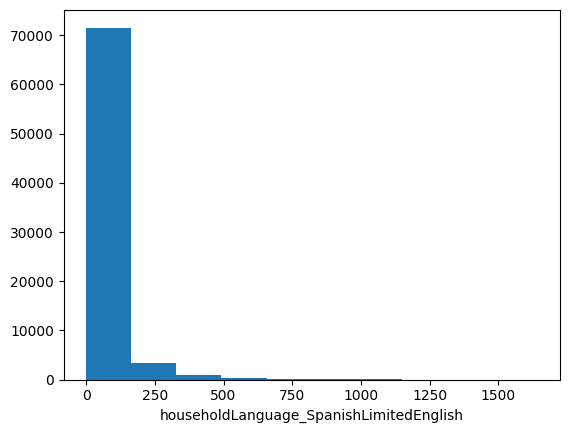

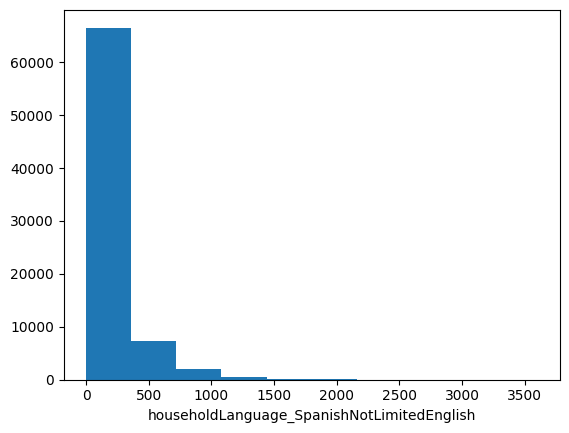

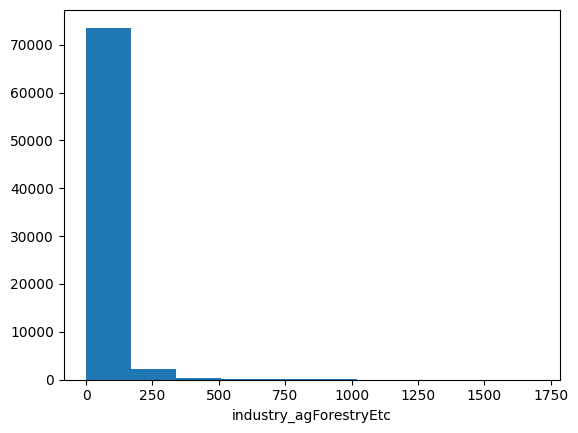

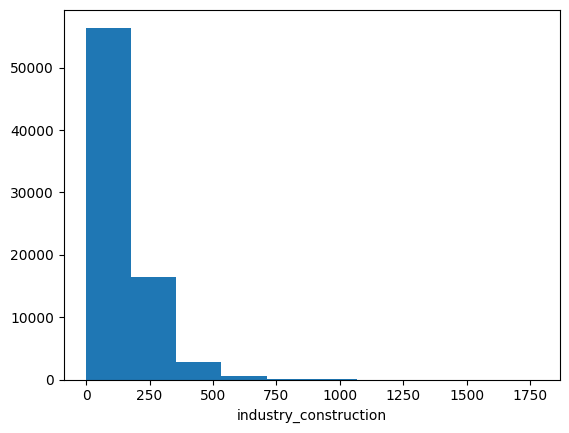

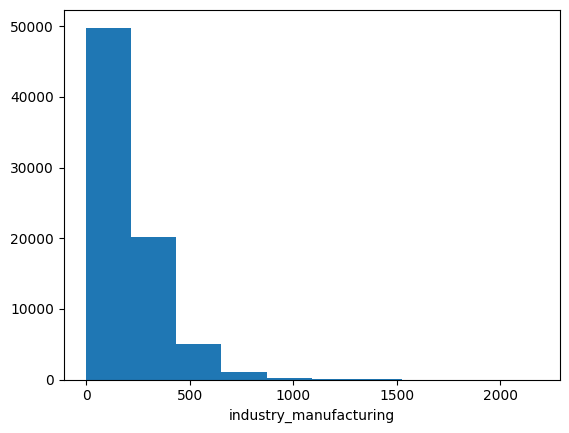

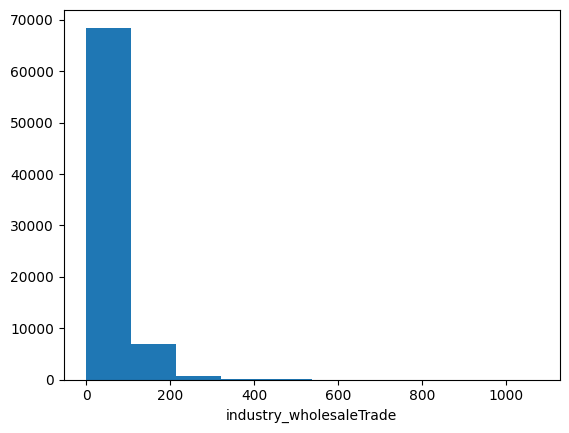

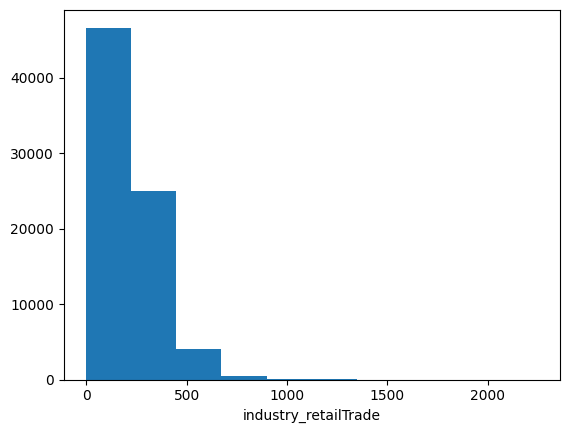

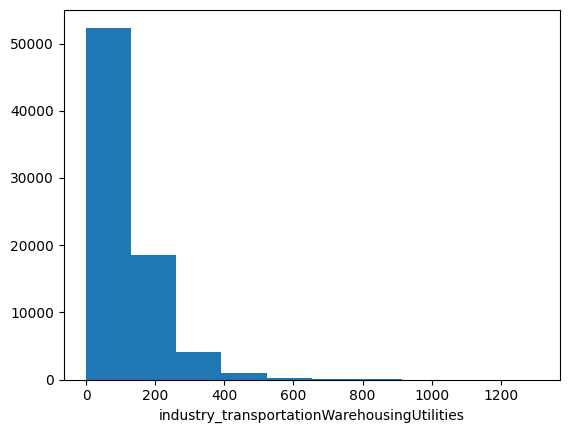

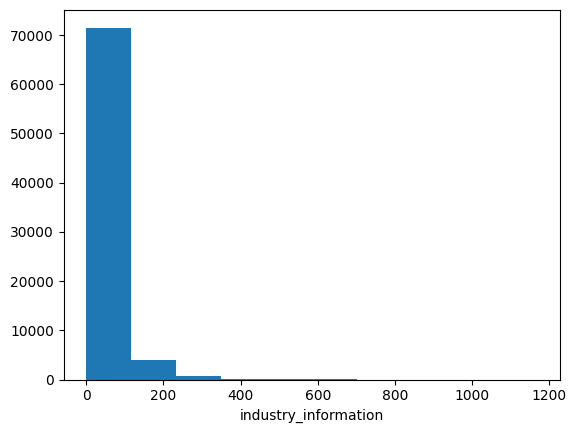

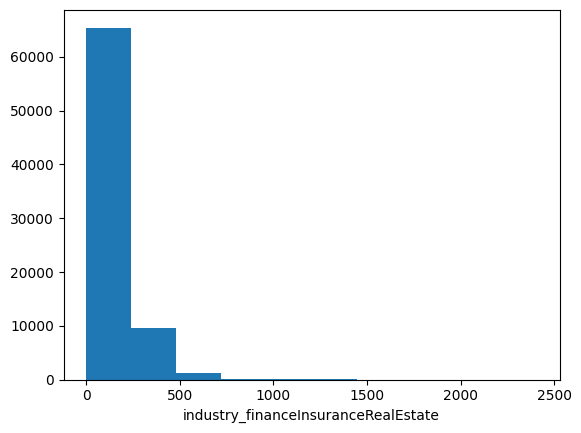

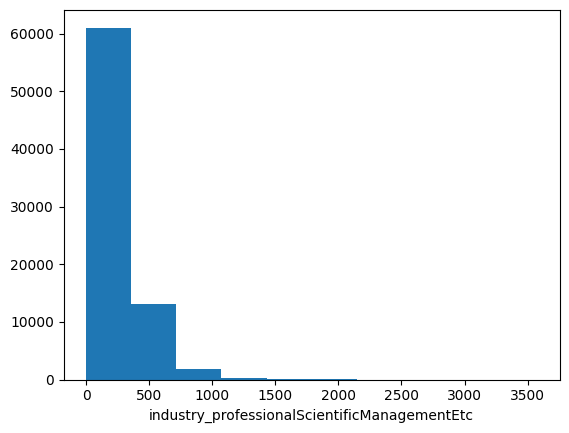

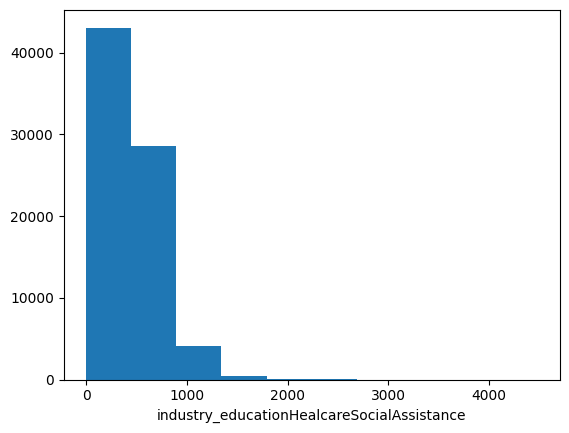

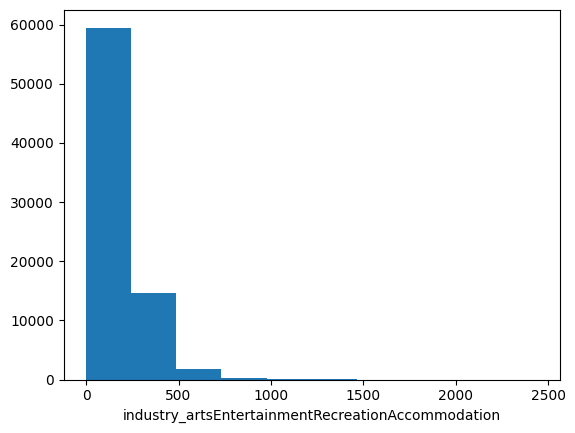

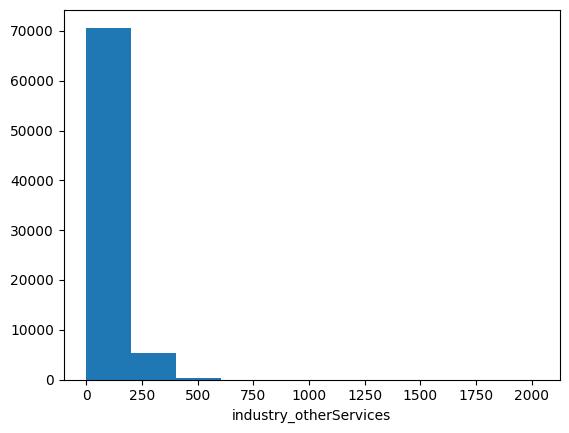

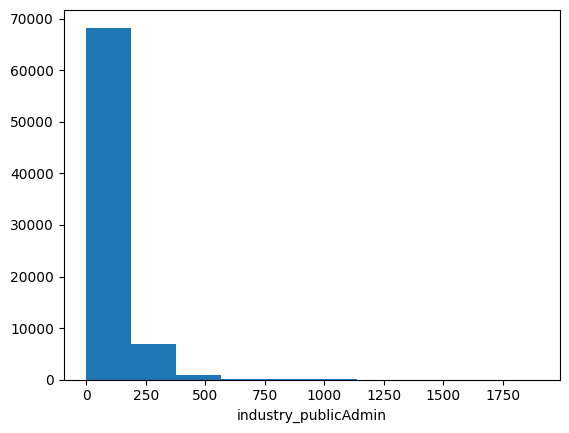

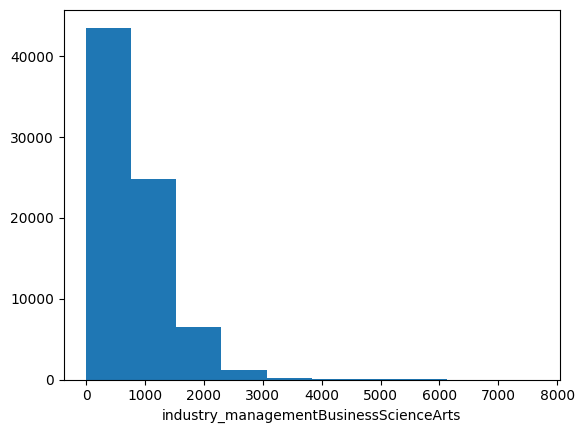

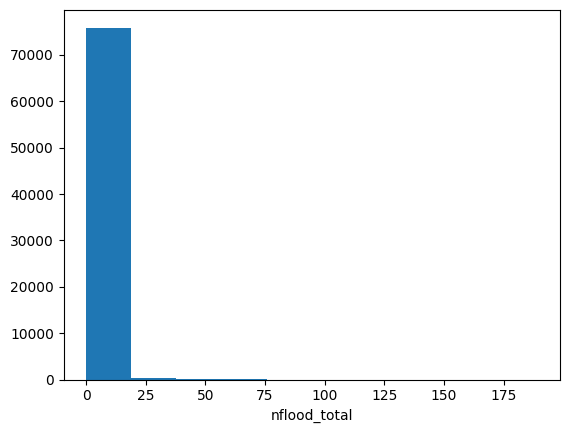

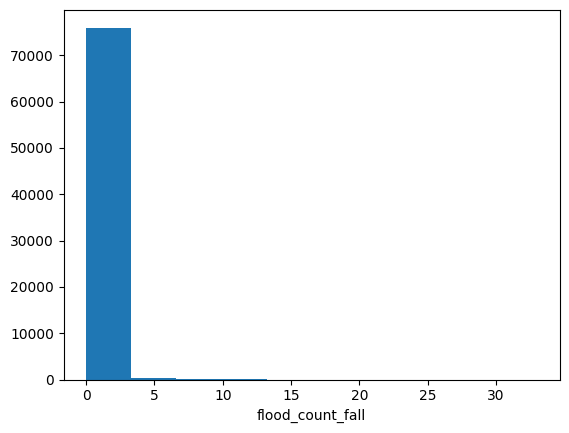

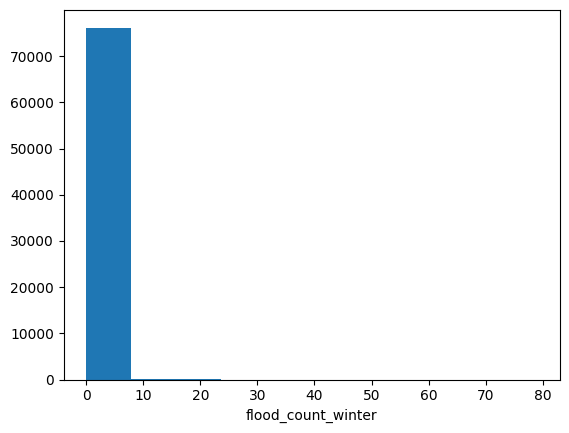

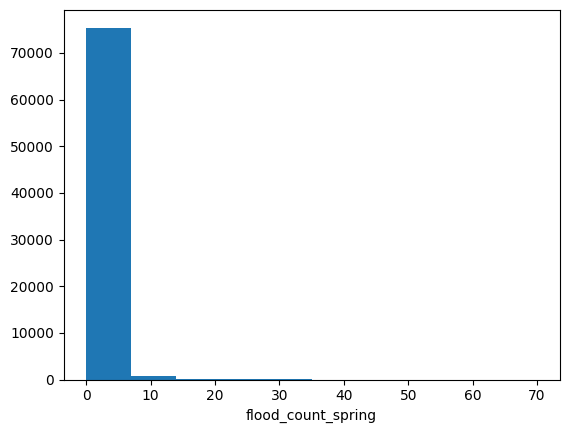

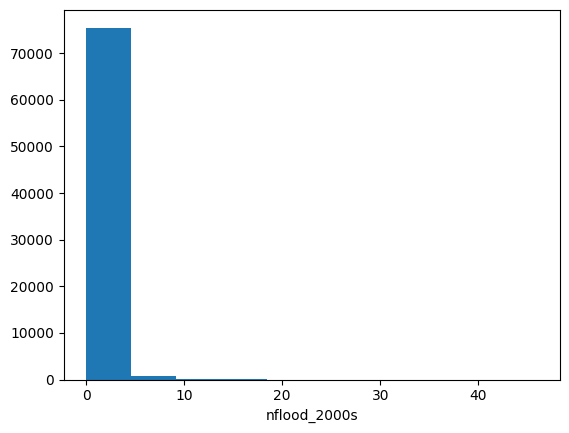

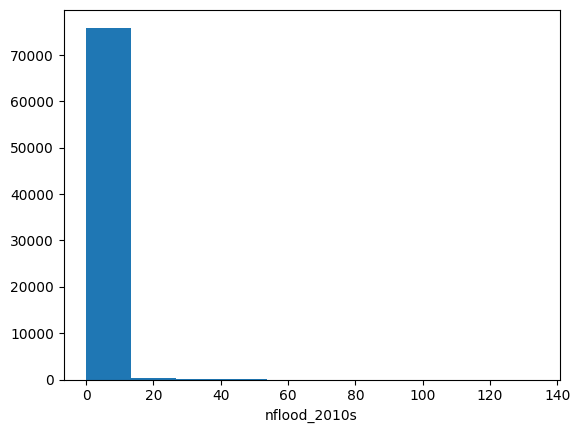

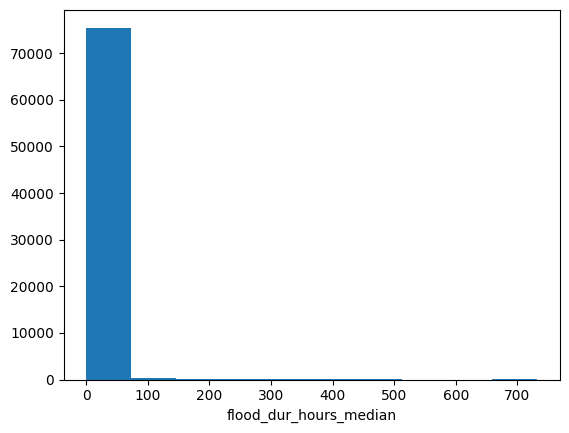

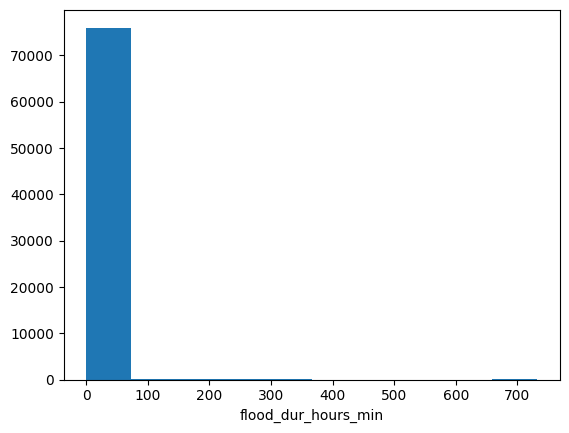

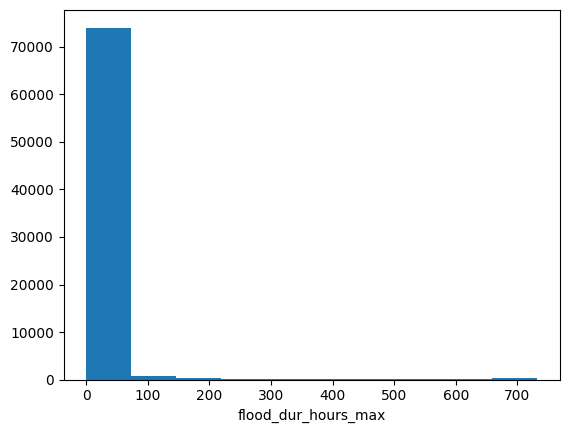

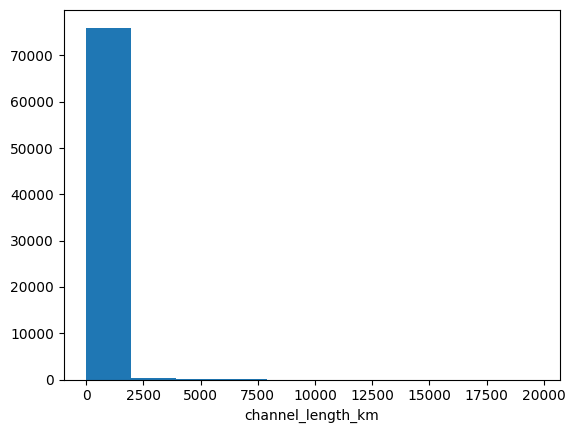

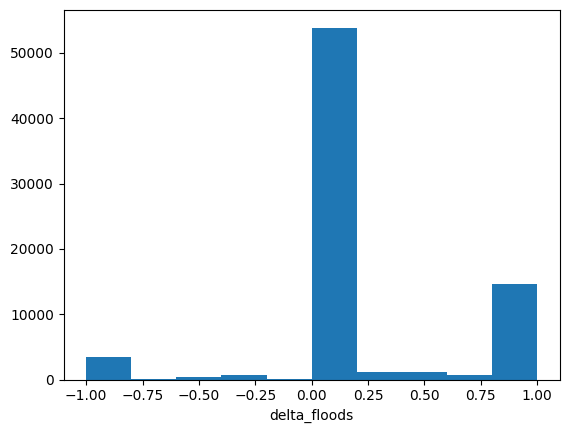

In [30]:
## plot each dataset

for n in data.columns:
    plt.hist(data[n])
    plt.xlabel(n)
    plt.show()


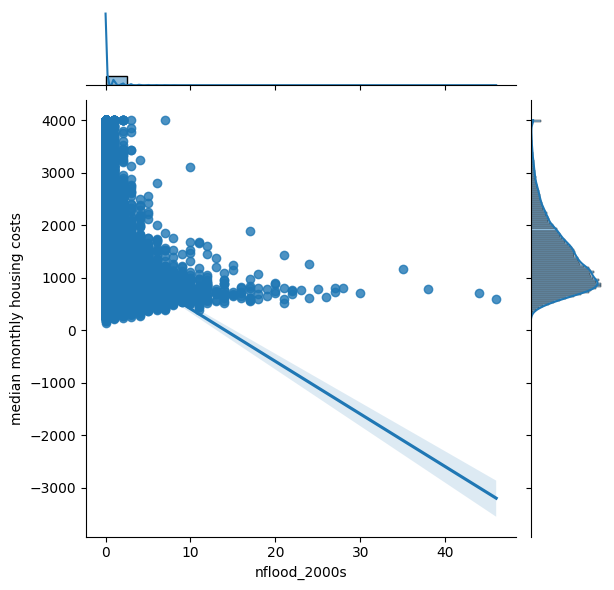

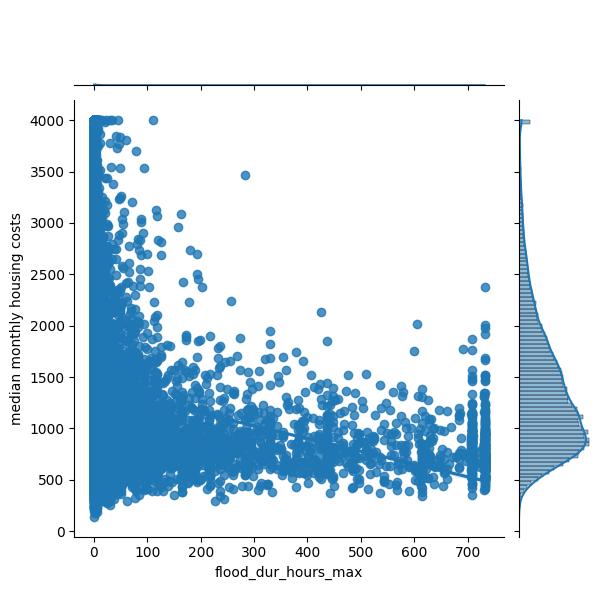

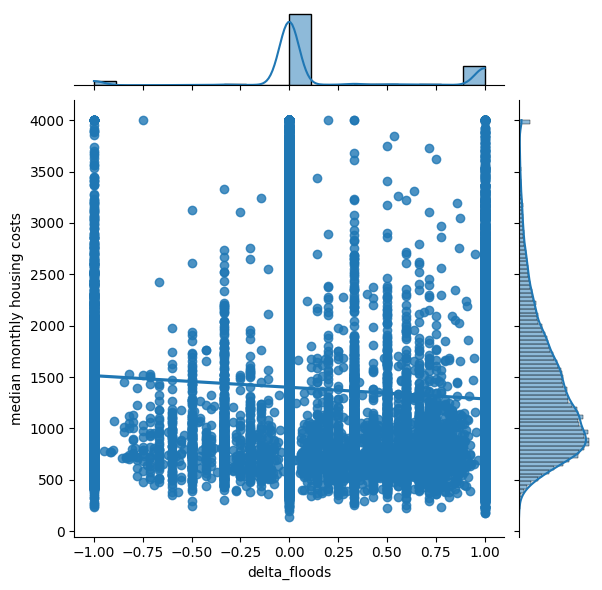

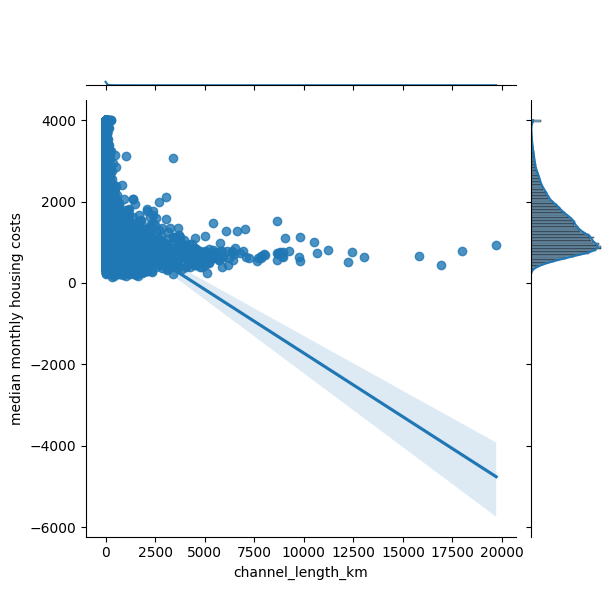

In [39]:
###plot 20th percentile income vs number of floods
pairplot_list = ['nflood_2000s', 'flood_dur_hours_max', 'delta_floods', 'channel_length_km']
for n in pairplot_list:
    sns.jointplot(data=data, x=n, y='median_monthly_housing_costs', kind='reg')
    plt.ylabel('median monthly housing costs')
    plt.xlabel(n)
    plt.show()



## Number of floods typically very small for most census tracts

some of the lowest-income tracts have very few floods. Probably cause it just doesn't flood there. How many have no floods at all? 


In [34]:
print('number of tracts with no floods: ', len(data.loc[data['nflood_total']==0, :])) 
data_morethan10 = data.loc[data['nflood_total']>10, :] 
print('number of tracts with more than 10 floods: ', len(data_morethan10)) 

data_morethan1 = data.loc[data['nflood_total']>1, :] 
print('number of tracts with more than 1 flood: ', len(data_morethan1)) 


number of tracts with no floods:  49307
number of tracts with more than 10 floods:  1481
number of tracts with more than 1 flood:  15389


In [35]:
###repeat corr with this data
data.corr()[['nflood_total', 'flood_count_winter', 'flood_count_spring']].sort_values('nflood_total')

,nflood_total,flood_count_winter,flood_count_spring
median_monthly_housing_costs,-0.189848,-0.126888,-0.189173
industry_professionalScientificManagementEtc,-0.130010,-0.093879,-0.131961
total_HousingCosts_1500To1999,-0.127879,-0.098404,-0.122413
total_HousingCosts_2000To2499,-0.122752,-0.090461,-0.121150
householdLanguage_SpanishNotLimitedEnglish,-0.114654,-0.083535,-0.110031
education_BachelorsDegree_over25,-0.107664,-0.082392,-0.105534
total_HousingCosts_2500To2999,-0.103352,-0.072221,-0.107060
industry_artsEntertainmentRecreationAccommodation,-0.099576,-0.072460,-0.101842
industry_financeInsuranceRealEstate,-0.094933,-0.074460,-0.087705
education_mastersDegree_over25,-0.093696,-0.073403,-0.100760


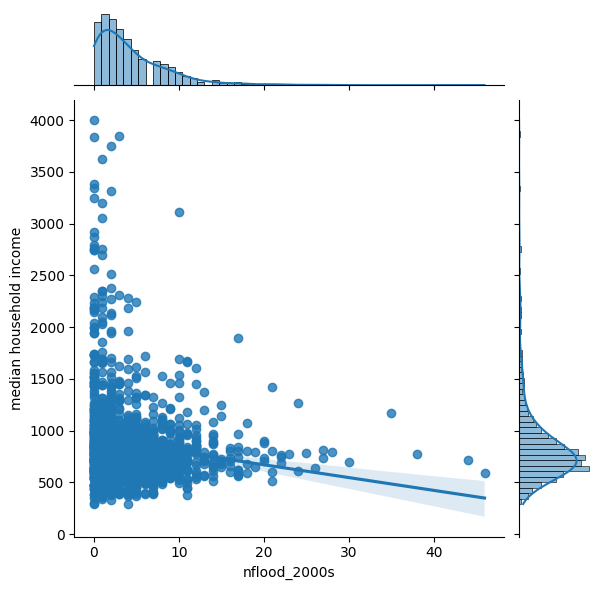

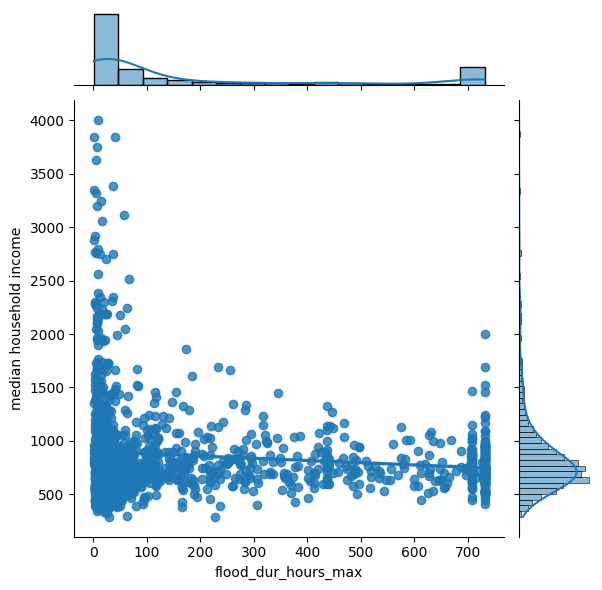

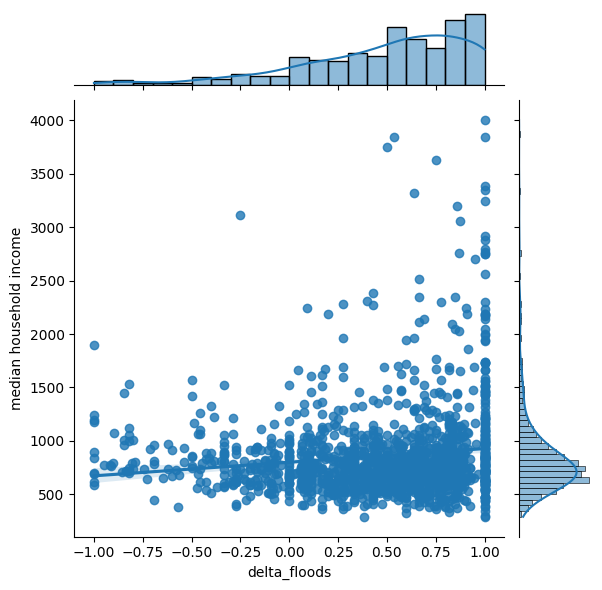

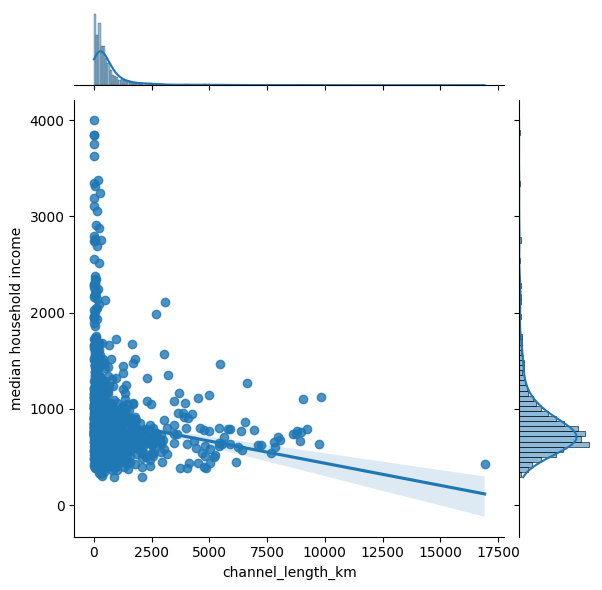

In [38]:
###plot median income vs number of floods
pairplot_list = ['nflood_2000s', 'flood_dur_hours_max', 'delta_floods', 'channel_length_km']
for n in pairplot_list:
    sns.jointplot(data=data_morethan10, x=n, y='median_monthly_housing_costs', kind='reg')
    plt.ylabel('median housing costs')
    plt.xlabel(n)
    plt.show()

## remove floods less than 10
probably not helpful to remove floods less than 10. Data still not linear, and removes tracts where num floods is low and income is high. 

In [37]:
data.to_csv('data/02_data.csv')

# Conclusions

1. Missing values removed, no outliers suggesting a data error
2. Data is not linear and so linear correlation is very low. Flood occurence possibly a Poisson distribution.
3. Best choice of target variable seems to be median housing costs.
4. A good starting place for explanatory variables seem to be number of floods between 2000 and 2010, change in floods, and max flood duration, channel length, and seasonal flood counts
5. Because data is not linear, modeling will likely begin with ML algorithms. 
